# Sampling Distributions Dance Party!
Get your dancing shoes ready! You are a DJ trying to make sure you are ready for a big party. You don’t have time to go through all the songs you can work with. Instead, you want to make sure that any sample of 30 songs from your playlist will get the party started. To do this, you will use the power of sampling distributions!

The dataset we are using for this project can be found here. For simplicity, we have removed some unnecessary columns.

Note that a **helper_function**.py file is loaded for you in the workspace. This file contains functions that you will use throughout this project. A **solution.py** file is also loaded for you in the workspace, which contains solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or want to check your answers when you’re done!

In [1]:
from helper_functions import choose_statistic, population_distribution, sampling_distribution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Tasks**

### Loading in the Data

**1.** You will be working with a dataset called **spotify_data.csv**. In **script.py**, use the `read_csv()` pandas function to load in **spotify_data.csv** into a variable called `spotify_data`.

<details><summary><i>Hint</i></summary>

To load in the data, write the following line of code:

>```py
>spotify_data = pd.read_csv('spotify_data.csv')
>```

</details>

In [2]:
# task 1: load in the spotify dataset
spotify_data = pd.read_csv('spotify_data.csv')

**2.** Use the pandas `.head()` function to preview the `spotify_data`. If you need a 
reminder of how to use this function, click the hint below.

<details><summary><i>Hint</i></summary>

To preview a dataframe using the `.head()` function, do the following:

>```py
>print(dataframe_variable.head())
>```

In **script.py**, our `dataframe_variable` is `spotify_data`.

In [3]:
# task 2: preview the dataset
spotify_data.head()

,tempo,danceability,energy,instrumentalness,liveness,valence
0,156.985,0.831,0.814,0.013400,0.0556,0.3890
1,115.080,0.719,0.493,0.000000,0.1180,0.1240
2,218.050,0.850,0.893,0.000004,0.3720,0.0391
3,186.948,0.476,0.781,0.000000,0.1140,0.1750
4,147.988,0.798,0.624,0.000000,0.1660,0.5910


**3.** For this project, we are going to focus on the `tempo` variable. This column gives the beats per minute (bpm) of each song in **spotify.csv**. The other columns in our dataset are:

>- `danceability`
>- `energy`
>- `instrumentalness`
>- `liveness`
>- `valences`
>
>For now, we are going to ignore these other columns.
>
>Create a variable called `song_tempos` that contains the `tempo` column data.

<details><summary><i>Hint</i></summary>

To save the `tempo` column data in a variable called `population`, do the following:

>```py
>population = spotify_data['tempo']
>```

In [4]:
# task 3: select the relevant column
song_tempos = spotify_data['tempo']

### Helper Functions

**4.** Let’s investigate the helper functions we will use in the following sections. A file called **helper_functions.py** should be opened in the workspace for you. It contains three functions: `choose_statistic()`, `population_distribution()`, and `sampling_distribution()`. The code in these functions is similar to what we saw in the previous lesson, but let’s explore these together.

>`choose_statistic()` allows us to choose a statistic we want to calculate for our sampling and population distributions. It contains two parameters:
>
>- `x`: An array of numbers
>- `sample_stat_text`: A string that tells the function which statistic to calculate on `x`. It takes on three values: “Mean”, “Minimum”, or “Variance”.
>
>`population_distribution()` allows us to plot the population distribution of a dataframe with one function call. It takes the following parameter:
>
>- `population_data`: the dataframe being passed into the function
>
>`sampling_distribution()` allows us to plot a simulated sampling distribution of a statistic. The simulated sampling distribution is created by taking random samples of some size, calculating a particular statistic, and plotting a histogram of those sample statistics. It contains three parameters:
>
>- `population_data`: the dataframe being sampled from
>- `samp_size`: the size of each sample
>- `stat`: the specific statistic being measured for each sample — either “Mean”, “Minimum”, or “Variance”
>
>Read through these functions in `helper_function.py` to familiarize yourself with them. Click the hint to see examples of `population_distribution()` and `sampling_distribution()` being used.

<details><summary><i>Hint</i></summary>

Here is an example of how to use `population_distribution()`:

>```py
># example function use case
>population_distribution(population)
>```

Here is an example of how to use `sampling_distribution()`:

>```py
># example function use case for sampling distribution of the mean
>sampling_distribution(population, "Mean")
>```

In [5]:
# task 4:
print('Pop Mean:', round(choose_statistic(song_tempos, 'Mean'),2))
print('Pop Minimum:', round(choose_statistic(song_tempos, 'Minimum'),2))
print('Pop Variance:', round(choose_statistic(song_tempos, 'Variance'),2))

# print(np.mean(song_tempos))
# print(np.var(song_tempos))
# print(np.std(song_tempos))

Pop Mean: 147.47
Pop Minimum: 57.97
Pop Variance: 568.57


### Sampling Distribution Exploration

**5.** Now that our data is loaded into **script.py** and we have gone over the functions in **helper_functions.py** let’s start our sampling distributions exploration. Make sure to write your code in **script.py**.

>To start off, let’s use the `population_distribution()` function to graph distribution of `song_tempos`.
>
>When you click run, you should see a graph with the following title:

>```
>Population Distribution
>```

>How would you describe this distribution?


<details><summary><i>Hint</i></summary>

To use the `population_distribution()` function, do the following:

>```py
>population_distribution(_____)
>```

In the blank, you should put `song_tempos` because it is our population data.

The population distribution is approximately normal with a little bit of right-skewness.

/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


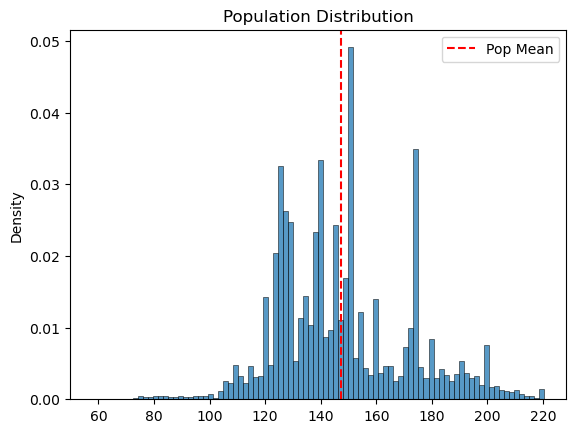

<Figure size 640x480 with 0 Axes>

In [6]:
# task 5: plot the population distribution with the mean labeled
population_distribution(population_data=song_tempos)

# sns.histplot(song_tempos); plt.title('Pop Distribution'); plt.show(); plt.clf()
# sns.histplot(song_tempos, stat='density'); plt.title('Pop Distribution'); plt.show(); plt.clf()
# plt.hist(song_tempos, bins=50); plt.show(); plt.clf()

**6.** Now let’s plot the sampling distribution of the sample mean with sample sizes of 30 songs. To do this, use the `sampling_distribution()` helper function.

>Once you hit run, you should see a graph with the following title:

>```
>Sampling Distribution of the Mean
>Mean of the Sample Means: {Mean of the Sample Means} 
>Population Mean: {Population Mean}
>```

<details><summary><i>Hint</i></summary>

To use the `sampling_distribution()` function, do the following:

>```py
>sampling_distribution(_____, _____, _____)
>```

In the first blank, you should put `song_tempos` because it is our population data. In the second blank, you should put 30 since we want each sample to be of size `30`. In the last blank, you should put `"Mean"` since we want to analyze the sampling distribution of the sample mean.

/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


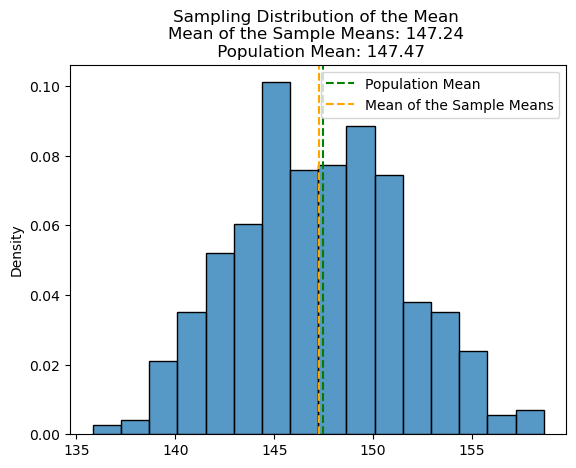

<Figure size 640x480 with 0 Axes>

In [7]:
# task 6: sampling distribution of the sample mean
sampling_distribution(population_data=song_tempos, samp_size=30, stat='Mean')

**7.** Compare your sampling distribution of the sample means to the population mean. Is the sample mean an unbiased or biased estimator of the population?

<details><summary><i>Hint</i></summary>

The mean is also an unbiased estimator as the mean of the sampling distribution of the mean is always approximately the same as the population mean.

In [8]:
# task 7:
print('Answer: Yes, the sample mean of sampling distribution is endeed the unbiased estimator of the population mean')

Answer: Yes, the sample mean of sampling distribution is endeed the unbiased estimator of the population mean


**8.** Now let’s plot the sampling distribution of the sample minimum with sample sizes of 30 songs. To do this, use the `sampling_distribution()` helper function.

>Once you hit run, you should see a graph with the following title:

>```
>Sampling Distribution of the Minimum
>Mean of the Sample Minimums: {Mean of the Sample Minimums}
>Population Mean: {Population Mean}
>```

<details><summary><i>Hint</i></summary>

To use the `sampling_distribution()` function, do the following:

>```py
>sampling_distribution(_____, _____, _____)
>```

In the first blank, you should put `song_tempos` because it is our population data. In the second blank, you should put `30` since we want each sample to be of size 30. In the last blank, you should put `"Minimum"` since we want to analyze the sampling distribution of the sample minimum.

/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


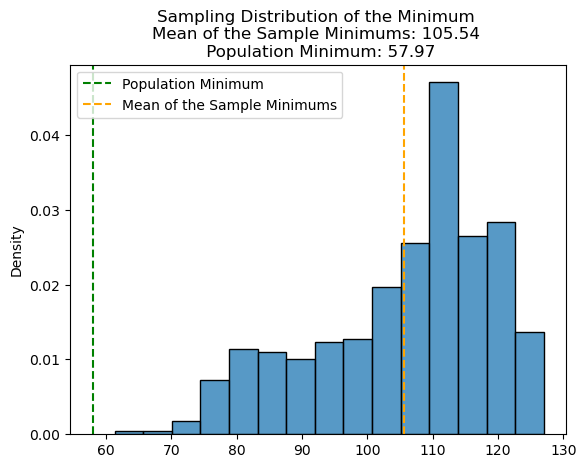

<Figure size 640x480 with 0 Axes>

In [9]:
# task 8: sampling distribution of the sample minimum
sampling_distribution(song_tempos, 30, 'Minimum')

**9.** Compare your sampling distribution of the sample minimums to the population minimum. Is the sample minimum an unbiased or biased estimator of the population?

<details><summary><i>Hint</i></summary>

Notice that the mean of the sample minimums is consistently much higher than the population minimum. Since you are looking for high-tempo songs for the party, this is actually a good thing! You will want to avoid having a lot of low-tempo songs.

In [10]:
# task 9:
print('Pop Min:', song_tempos.min())
print('Answer: The mean of the sample minimum is consistently much higher thwn the population minimum, hence, it is a biased estimator of the population.')

Pop Min: 57.967
Answer: The mean of the sample minimum is consistently much higher thwn the population minimum, hence, it is a biased estimator of the population.


**10.** Now let’s plot the sampling distribution of the sample variance with sample sizes of 30 songs. To do this, use the `sampling_distribution()` helper function.

Once you hit run, you should see a graph with the following title:

>```
>Sampling Distribution of the Variance
>Mean of the Sample Variances: {Mean of the Sample Variances}
>Population Variance: {Population Variance}
>```

<details><summary><i>Hint</i></summary>

To use the `sampling_distribution()` function, do the following:

>```py
>sampling_distribution(_____, _____, _____)
>```

In the first blank, you should put `song_tempos` because it is our population data. In the second blank, you should put `30` since we want each sample to be of size 30. In the last blank, you should put `"Variance"` since we want to analyze the sampling distribution of the sample variance.

/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


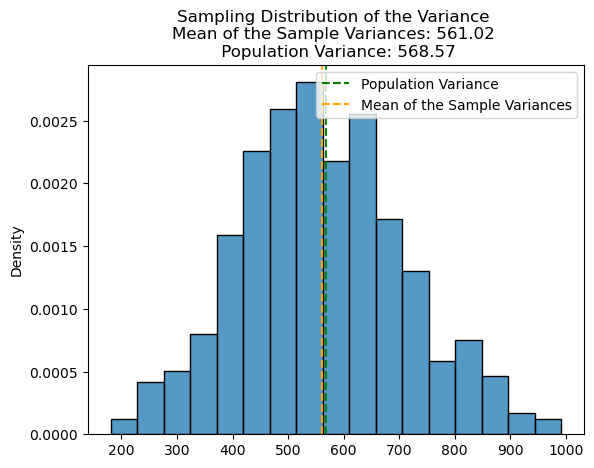

<Figure size 640x480 with 0 Axes>

In [11]:
# task 10: sampling distribution of the sample variance np.var(x, ddof=0)
sampling_distribution(population_data=song_tempos, samp_size=30, stat='Variance')

**11.** Compare your sampling distribution of the sample variance to the population variance. Does the sample variance appear to be an unbiased or biased estimator of the population?

>Click the hint for more information about sample variance.

<details><summary><i>Hint</i></summary>

The mean of the sample variances is consistently slightly less than the population variance, meaning it is a biased estimator. However, it is super close. Let’s dig into this.

We calculated the sample variance the same way we calculate population variance..

However, the formulas for sample variance and population variance are actually distinct. As we have seen, population variance is calculated as:

$$ population\,variance = \frac{\sum(observation - \\mu)^2}{n} $$
​ 
When we measure the sample variance using the same formula, it turns out that we tend to underestimate the population variance. Because of this, we divide by n-1 instead of n:

$$ sample\,variance = \frac{\sum(observation - sample\,mean)^2}{n - 1} $$

Using this formula, sample variance becomes an unbiased estimator of the population variance. Let’s apply this in the next task!

In [12]:
# task 11:
print('Pop Variance:', song_tempos.var())
print('Answer: The mean of the sample variance is consistently less than the population variance, hence it is a biased estimator of the population. However it is close to the population variance!')

Pop Variance: 568.5660610520162
Answer: The mean of the sample variance is consistently less than the population variance, hence it is a biased estimator of the population. However it is close to the population variance!


**12.** Go to line 17 in **helper_functions.py**. You should see the following line of code:

>```py
>np.var(x)
>```

Change this to:

>```py
>np.var(x, ddof=1)
>```

Adding this `ddof=1` parameter will divide our input by *n-1* instead of *n*, therefore applying the sample variance formula.

After changing this line of code, run **script.py**. Does the sample variance appear to be an unbiased or biased estimator of the population?

<details><summary><i>Hint</i></summary>

By changing the way we calculate sample variance, we have made it an unbiased parameter.

/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


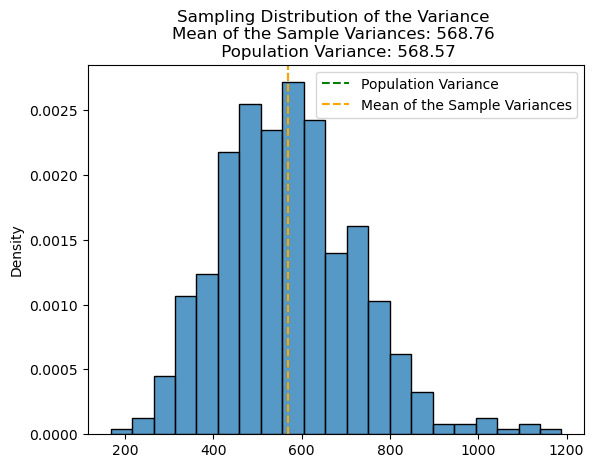

Comment: By changing the way we calculate sample variance ("ddof=1"), applying the "Bessel's Correction", we have made it an unbiased parameter!


<Figure size 640x480 with 0 Axes>

In [13]:
# task 12:
# change in line 17 in helper_functions.py np.var(x) to np.var(x,ddof=1) applying the "Bessel’s correction" on denominator=(N - 1)
sampling_distribution(song_tempos, samp_size=30, stat='Variance')
print('Comment: By changing the way we calculate sample variance ("ddof=1"), applying the "Bessel\'s Correction", we have made it an unbiased parameter!')

### Calculating Probabilities

**13.** We have a good sense of some sample statistics now that we’ve investigated sampling distributions. Let’s take our analysis further by calculating probabilities.

>First, calculate the population mean and population standard deviation of `song_tempos`. Save these values in two separate variables called `population_mean` and `population_std`.

<details><summary><i>Hint</i></summary>

Use the `.mean()` and `.std()` NumPy methods.

In [14]:
# task 13: calculate the population mean and standard deviation
pop_mean = np.mean(song_tempos)
pop_std = np.float64(np.std(song_tempos))
# print(type(pop_mean)); print(type(pop_std))
print('Pop Mean:', pop_mean.round(2))
print('Pop Std Dev:', pop_std.round(2))

Pop Mean: 147.47
Pop Std Dev: 23.84


**14.** Use `population_mean` and `population_std` to calculate the standard error of the sampling distribution of the sample mean with a sample size of 30.

>Save this value in a variable called `standard_error`.

<details><summary><i>Hint</i></summary>

The formula for the standard error of the sample mean is:

$$ standard~error = \frac{standard~deviation}{square~root~of~the~sample~size}

In [15]:
# task 14: calculate the standard error. Sample size of 30
standard_error = pop_std / 30**.5  # std_dev / (sqrt of sample size)
print('Sample Standard Error:', round(standard_error, 2))

Sample Standard Error: 4.35


**15.** You are afraid that if the average tempo of the songs you randomly select is less than 140bpm that your party will not be enjoyable.

>Using `population_mean` and `standard_error` in a CDF, calculate the probability that the sample mean of 30 selected songs is less than 140bpm.
>
>Remember to print your result into the output terminal.

<details><summary><i>Hint</i></summary>

Use the `.cdf()` method from the SciPy library.

As a reminder to use the `.cdf()` method, do the following:

>```py
>print(stats.norm.cdf(value_of_interest, mean, standard_error))
>```

In this case, our `value_of_interest` is 140; our mean is `population_mean`; our `standard_error` is also called `standard_error`.

In [16]:
# task 15: calculate the probability of observing an average tempo of 140bpm or lower from a sample of 30 songs
prob_140bpm_or_less = stats.norm.cdf(x=140, loc=pop_mean, scale=standard_error)
print('Prob. of observing tempo of 140bpm or lower from sample of 30 songs:', prob_140bpm_or_less.round(6))

Prob. of observing tempo of 140bpm or lower from sample of 30 songs: 0.043004


**16.** You know the party will be truly epic if the randomly sampled songs have an average tempo of greater than 150bpm.

>Using `population_mean` and `standard_error` in a CDF, calculate the probability that the sample mean of 30 selected songs is GREATER than 150bpm.
>
>Remember to print your result into the output terminal.
>
>Does this probability make you feel confident about the party?

<details><summary><i>Hint</i></summary>

Use the `.cdf()` method from the SciPy library.

As a reminder, to use the `.cdf()` method to calculate the probability of observing some value of interest or greater, do the following:

>```py
>print(1 - stats.norm.cdf(value_of_interest, mean, standard_error))
>```

In this case, our `value_of_interest` is 150; our mean is `population_mean`; our `standard_error` is also called `standard_error`.

In [17]:
# task 16: calculate the probability of observing an average tempo of 150bpm or higher from a sample of 30 songs
prob_150bpm_or_more = 1 - stats.norm.cdf(x=149.9999, loc=pop_mean, scale=standard_error)
print('Prob. of observing tempo of 150bpm or higher from sample of 30 songs:', prob_150bpm_or_more.round(6))

Prob. of observing tempo of 150bpm or higher from sample of 30 songs: 0.280888


### Extras

**17.** Awesome job! You are ready to throw an awesome party! If you want to do some more exploration of sampling distributions, here are some more opportunities:

>- Add another sample statistic to the `choose_statistic()` function in **helper_functions.py** — such as median, mode, or maximum.
>- Explore a different column of data from the **spotify_data.csv** dataset.
>- Use the sampling distribution of the sample minimum to estimate the probability of observing a specific sample minimum. For example, from the plot, what is the chance of getting a sample minimum that is less than 130bpm?

Happy coding!

In [20]:
# EXTRA
# Add another sample statistic to the choose_statistic() function in helper_functions.py — such as median, mode, or maximum.
print('Pop Max:',choose_statistic(song_tempos, 'Maximum'))
print('Pop Median:', choose_statistic(song_tempos, 'Median'))
print('Pop Mode:', choose_statistic(song_tempos, 'Mode'))

Pop Max: 220.29
Pop Median: 144.973
Pop Mode: 150.02


In [21]:
# Explore a different column of data from the spotify_data.csv dataset.
print(spotify_data.info())
print(spotify_data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo             42305 non-null  float64
 1   danceability      42305 non-null  float64
 2   energy            42305 non-null  float64
 3   instrumentalness  42305 non-null  float64
 4   liveness          42305 non-null  float64
 5   valence           42305 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB
None
              tempo  danceability        energy  instrumentalness  \
count  42305.000000  42305.000000  42305.000000      42305.000000   
mean     147.474056      0.639364      0.762516          0.283048   
std       23.844623      0.156617      0.183823          0.370791   
min       57.967000      0.065100      0.000243          0.000000   
25%      129.931000      0.524000      0.632000          0.000000   
50%      144.973000      0.646000      0.803000          

/Users/matth/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


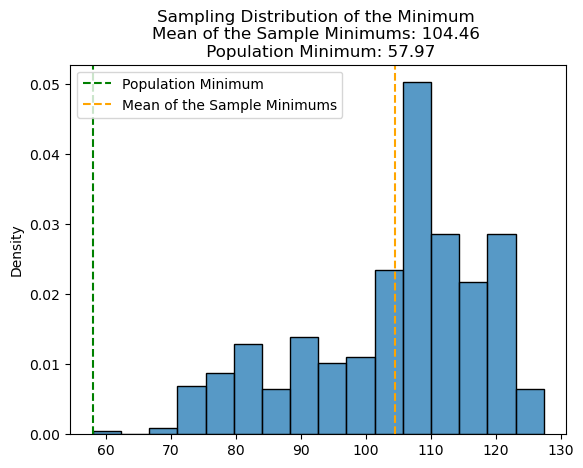

Prob. of observing tempo of 104bpm or lower from sample of 30 songs: 0.0


<Figure size 640x480 with 0 Axes>

In [23]:
# Use the sampling distribution of the sample minimum to estimate the probability of observing a specific sample minimum. For example, from the plot, what is the chance of getting a sample minimum that is less than 130bpm?
sampling_distribution(song_tempos, 30, 'Minimum')
prob_104bpm_or_more = stats.norm.cdf(x=104, loc=pop_mean, scale=standard_error)
print('Prob. of observing tempo of 104bpm or lower from sample of 30 songs:', prob_104bpm_or_more.round(6))